# 212.3
### Eric Yarger

## Research Question

### Using Market Basket Analysis, what are the top rules 
### and insights discovered from our patient's prescription history, 
### using a support minimum > .03, that can help guide our organization 
### to providing better patient care and organizational profitability?


In [1]:
# Import General Libraries
import pandas as pd
from scipy import stats
import missingno as msno


In [2]:
# Import Market Basket specific libraries
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# Windows 10, Anaconda, JupyterLab, JupyterNotebook
# Jupyter environment version
!jupyter --version

jupyter core     : 4.6.3
jupyter-notebook : 6.0.3
qtconsole        : 4.7.2
ipython          : 7.13.0
ipykernel        : 5.1.4
jupyter client   : 6.1.2
jupyter lab      : 1.2.6
nbconvert        : 5.6.1
ipywidgets       : 7.5.1
nbformat         : 5.0.4
traitlets        : 4.3.3


In [4]:
# Python Environment version
import platform
print(platform.python_version())

3.7.7


In [5]:
# Read in data file
df = pd.read_csv('C:/Users/ericy/Desktop/medical_market_basket.csv')

## Initial Data Exploration

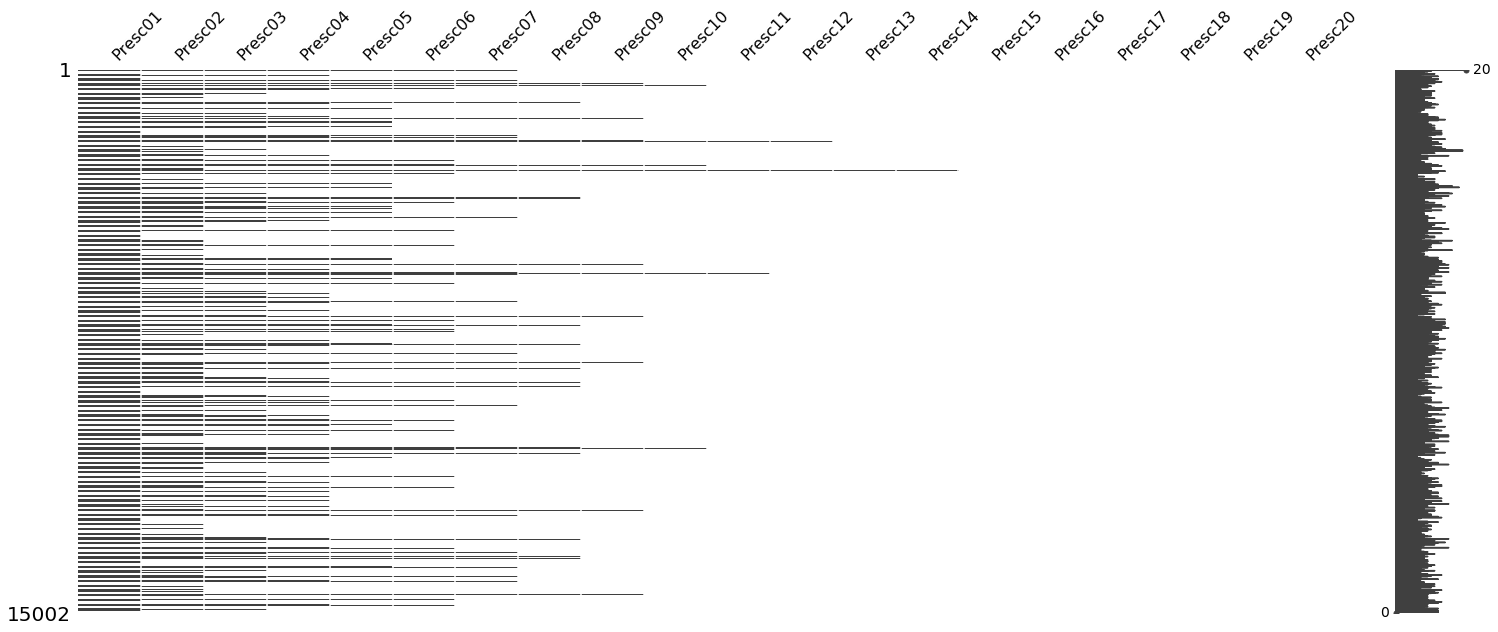

In [6]:
msno.matrix(df)

## Select relevant rows

In [7]:
# Every other row is blank.
# Select every other row (that contains values).
# Update variable

df = df.iloc[1::2]

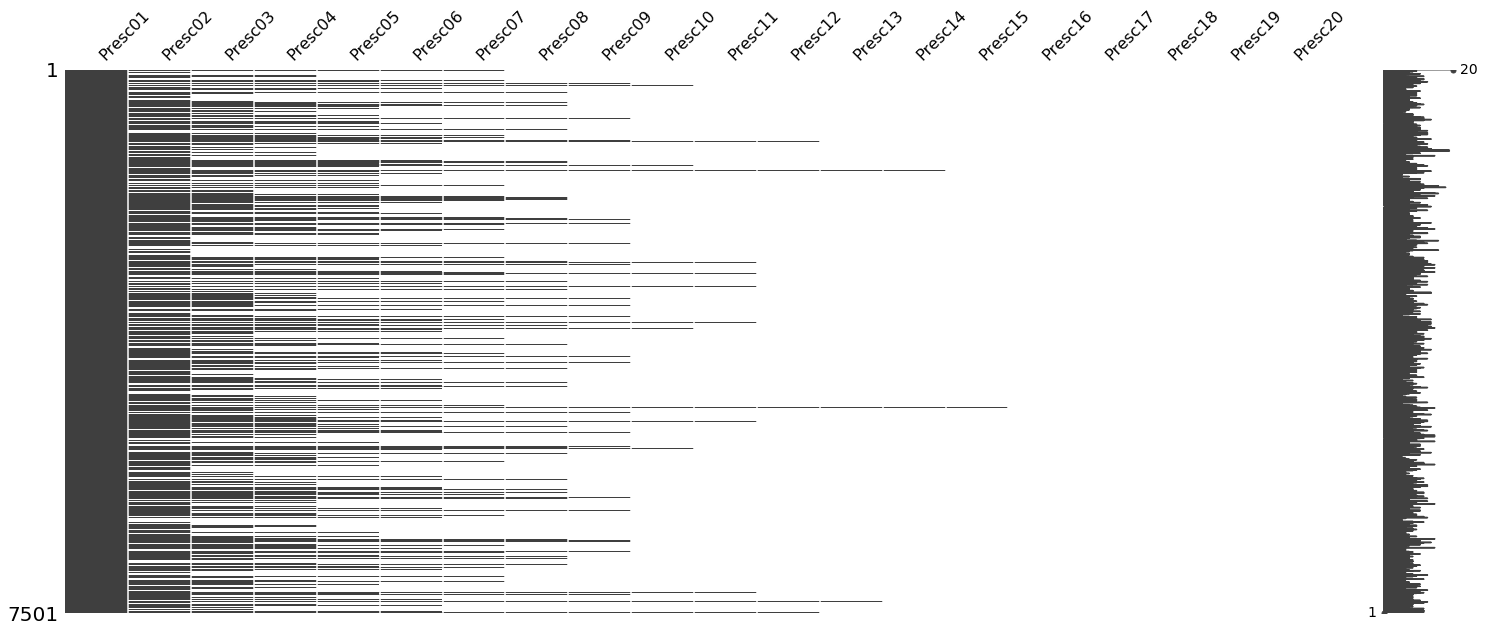

In [8]:
msno.matrix(df)

In [9]:
# Read out intermediary file.
df.to_excel('C:/Users/ericy/Desktop/D212.3.xlsx', index=False)

In [10]:
# Read in intermediary file.
df = pd.read_excel('C:/Users/ericy/Desktop/D212.3.xlsx')

In [11]:
# Import Transaction Encoder
from mlxtend.preprocessing import TransactionEncoder

In [12]:
df_out = df.apply(lambda x: list(x.dropna().values), axis=1).tolist()

In [13]:
# Transaction Encoding
# Converts item lists into transaction data for itemset mining.
# This fits our df_out dataset and transforms to Boolean values.
# Eliminates NaN values, and prepares the dataset for Apriori Algorithm

# code reference (Raschka, n.d.a)
# code reference (Boston, 2019)

te = TransactionEncoder()
te_arr = te.fit(df_out).transform(df_out)
#te_arr

In [14]:
# Assign Transaction Encoder variable 'te' columns to variable
# Necessary for providing relevant, easy to read output from Apriori results

column_names = te.columns_


In [15]:
# Optional read out for integers instead of boolean array

# te_int = te_arr.astype('int')
# te_int

In [16]:
# Assign Boolean Array to pandas dataframe.  

#Assign column name of drug from varible 'column_name'

dataset = pd.DataFrame(te_arr, columns=column_names)


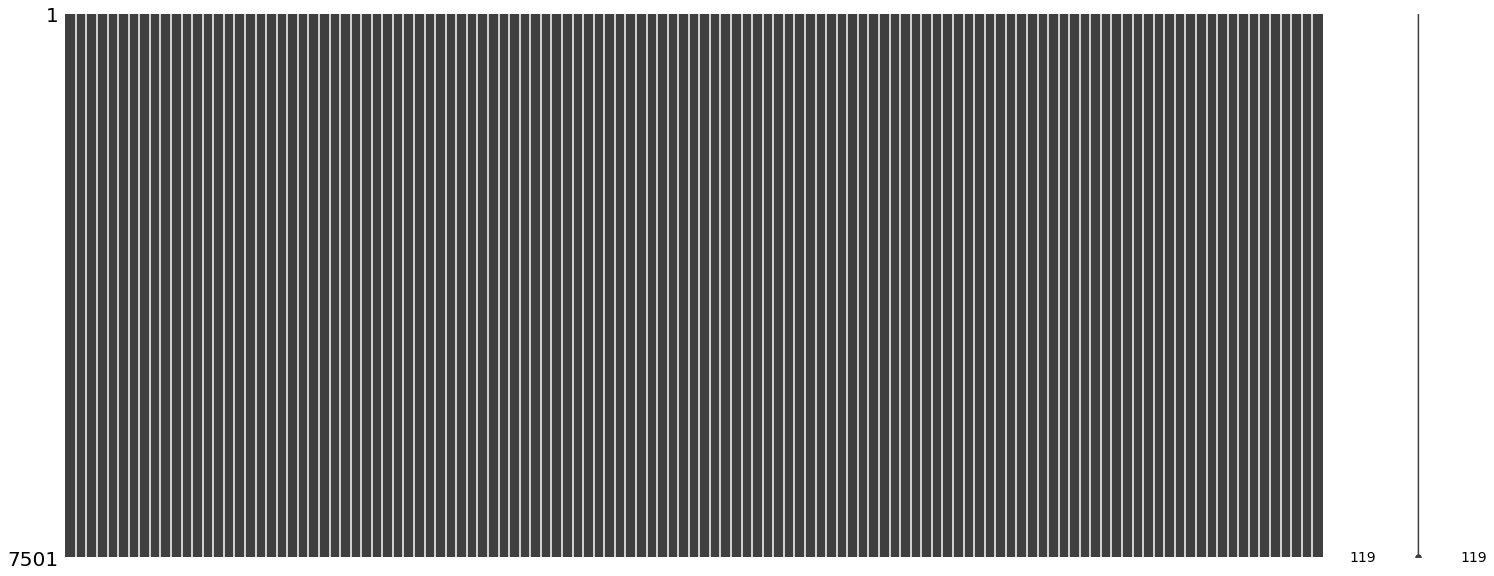

In [17]:
msno.matrix(dataset)

In [18]:
# Read out fully prepared dataset to Excel file.

dataset.to_excel('C:/Users/ericy/Desktop/D212.3.clean.xlsx', index=False)

In [19]:
dataset.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,...,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Market Basket Analysis using Apriori Algorithm

In [20]:
# Apriori Market Basket Analysis
# Code Reference (Raschka, n.d.b)

# Testing different min_support thresholds

itemsets = apriori(dataset, min_support=0.05, use_colnames=True)

In [21]:
itemsets

,support,itemsets
0,0.238368,(abilify)
1,0.079323,(alprazolam)
2,0.071457,(amlodipine)
3,0.068391,(amphetamine salt combo)
4,0.179709,(amphetamine salt combo xr)
5,0.129583,(atorvastatin)
6,0.174110,(carvedilol)
7,0.076523,(cialis)
8,0.087188,(citalopram)
9,0.059992,(clopidogrel)


In [22]:
itemsets = apriori(dataset, min_support=0.08, use_colnames=True)

In [23]:
itemsets

,support,itemsets
0,0.238368,(abilify)
1,0.179709,(amphetamine salt combo xr)
2,0.129583,(atorvastatin)
3,0.174110,(carvedilol)
4,0.087188,(citalopram)
5,0.081056,(dextroamphetamine XR)
6,0.163845,(diazepam)
7,0.095054,(doxycycline hyclate)
8,0.080389,(ezetimibe)
9,0.170911,(glyburide)


In [24]:
itemsets = apriori(dataset, min_support=0.2, use_colnames=True)

In [25]:
itemsets

,support,itemsets
0,0.238368,(abilify)


In [26]:
itemsets = apriori(dataset, min_support=0.015, use_colnames=True)

In [27]:
itemsets

,support,itemsets
0,0.046794,(Premarin)
1,0.238368,(abilify)
2,0.015731,(acetaminophen)
3,0.020397,(albuterol aerosol)
4,0.033329,(allopurinol)
...,...,...
148,0.015998,"(methylprednisone, lisinopril)"
149,0.016931,"(metoprolol, lisinopril)"
150,0.015731,"(carvedilol, abilify, atorvastatin)"
151,0.015865,"(carvedilol, diazepam, abilify)"


In [28]:
freq_sets = apriori(dataset, min_support=0.03, use_colnames=True)
freq_sets['length'] = freq_sets['itemsets'].apply(lambda x: len(x))
freq_sets

,support,itemsets,length
0,0.046794,(Premarin),1
1,0.238368,(abilify),1
2,0.033329,(allopurinol),1
3,0.079323,(alprazolam),1
4,0.071457,(amlodipine),1
5,0.030129,(amphetamine),1
6,0.068391,(amphetamine salt combo),1
7,0.179709,(amphetamine salt combo xr),1
8,0.129583,(atorvastatin),1
9,0.174110,(carvedilol),1


In [29]:
freq_sets[ (freq_sets['length'] == 2) &
                   (freq_sets['support'] >= 0.03) ]

,support,itemsets,length
36,0.050927,"(amphetamine salt combo xr, abilify)",2
37,0.047994,"(abilify, atorvastatin)",2
38,0.059725,"(carvedilol, abilify)",2
39,0.052660,"(diazepam, abilify)",2
40,0.033729,"(doxycycline hyclate, abilify)",2
41,0.033729,"(abilify, glyburide)",2
42,0.040928,"(abilify, lisinopril)",2
43,0.031063,"(losartan, abilify)",2
44,0.035729,"(metoprolol, abilify)",2
45,0.030796,"(amphetamine salt combo xr, atorvastatin)",2


In [30]:
# Code Reference (Brown, 2019)
# 18 total itemsets
rules = association_rules(freq_sets, min_threshold=.03)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
1,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
2,(abilify),(atorvastatin),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
3,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
4,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
5,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
6,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
7,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
9,(abilify),(doxycycline hyclate),0.238368,0.095054,0.033729,0.141499,1.488616,0.011071,1.054100


In [32]:
# Uncomment below lines to sort by confidence, support, or lift in descending order

rules.sort_values(by=['confidence'], ascending=False)

#rules.sort_values(by=['support'], ascending=False)

#rules.sort_values(by=['lift'], ascending=False)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(lisinopril),(abilify),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
33,(lisinopril),(carvedilol),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
16,(metoprolol),(abilify),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
3,(atorvastatin),(abilify),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
8,(doxycycline hyclate),(abilify),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
4,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
6,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
0,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
27,(atorvastatin),(carvedilol),0.129583,0.174110,0.035462,0.273663,1.571779,0.012900,1.137061
5,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
